In [40]:
import pandas as pd

data = pd.read_excel('/Users/ohajati/Desktop/ML_Sleep_apnea/data.xlsx')
data.head()

,Gender,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,AHI
0,M,0.0,14.0,29.065927,88.0,174.0,57.5,39.0,95.5,106.5,20.0,2.903226
1,M,0.0,8.0,26.989619,78.0,170.0,57.0,36.5,90.0,100.0,20.0,1.022727
2,M,0.0,16.0,23.939481,75.0,177.0,59.0,39.0,88.0,104.0,20.0,0.518359
3,M,0.0,15.0,22.129740,67.0,174.0,57.0,35.0,74.0,94.0,20.0,0.559006
4,M,0.0,15.0,22.129740,67.0,174.0,57.0,35.0,74.0,94.0,20.0,0.559006


In [41]:
numeric_cols = data.select_dtypes(include=['number']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Fill missing values for categorical columns with the mode
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Display the updated DataFrame
print(data.head())


  Gender   BQ   ESS        BMI  Weight  Height  Head  Neck  Waist  Buttock  \
0      M  0.0  14.0  29.065927    88.0   174.0  57.5  39.0   95.5    106.5   
1      M  0.0   8.0  26.989619    78.0   170.0  57.0  36.5   90.0    100.0   
2      M  0.0  16.0  23.939481    75.0   177.0  59.0  39.0   88.0    104.0   
3      M  0.0  15.0  22.129740    67.0   174.0  57.0  35.0   74.0     94.0   
4      M  0.0  15.0  22.129740    67.0   174.0  57.0  35.0   74.0     94.0   

    Age       AHI  
0  20.0  2.903226  
1  20.0  1.022727  
2  20.0  0.518359  
3  20.0  0.559006  
4  20.0  0.559006  


In [42]:
print(data['Gender'].unique())

# Assuming the gender column has values like 'M' for male and 'F' for female
# You can map them to numeric values: 'M' to 1 and 'F' to 0 (or vice versa)
data['Gender'] = data['Gender'].map({'M': 1, 'F': 0})

print(data['Gender'].unique())

['M' 'F']
[1 0]


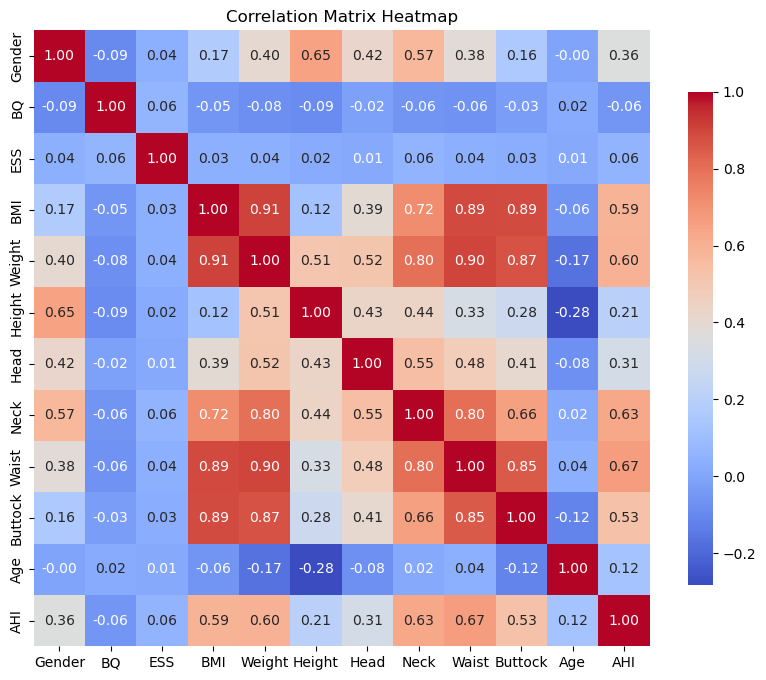

In [43]:
correlation_matrix = data.corr()
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Add title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

In [44]:
# Normalize numerical features to ensure uniform scale.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['BQ','ESS','BMI','Weight','Height','Head' ,'Neck','Waist','Buttock','Age']] = scaler.fit_transform(data[['BQ','ESS','BMI','Weight','Height','Head' ,'Neck','Waist','Buttock','Age']])


In [45]:
from sklearn.model_selection import train_test_split

X = data.drop('AHI', axis=1)  # Features
y = data['AHI']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [46]:
# Initialize and train the regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [47]:
y_pred = model.predict(X_test)

In [48]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Absolute Error: 16.147133269577647
Mean Squared Error: 399.6870288193001
R² Score: 0.482909645766196


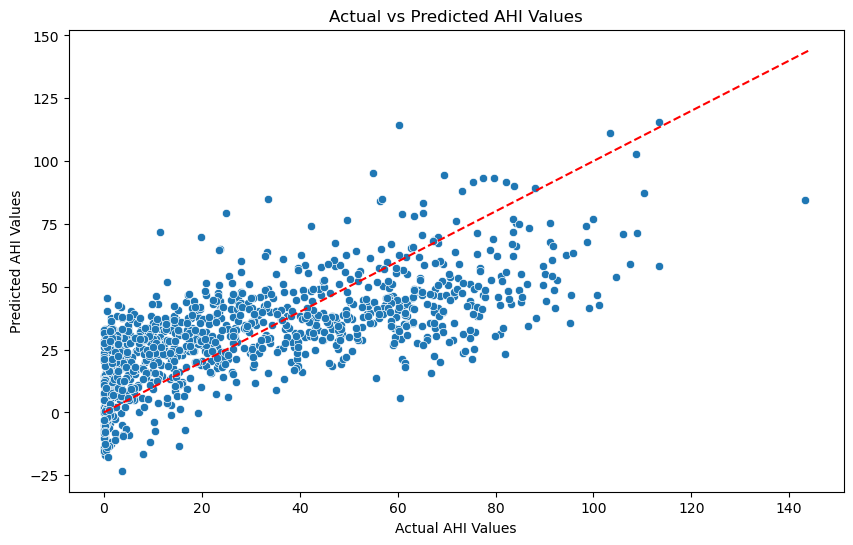

In [49]:
# Optional: Visualize the predicted vs actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual AHI Values')
plt.ylabel('Predicted AHI Values')
plt.title('Actual vs Predicted AHI Values')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Line for perfect predictions
plt.show()

In [50]:
from sklearn.preprocessing import PolynomialFeatures


poly = PolynomialFeatures(degree=2)  # Adjust degree as needed
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

model = LinearRegression()
model.fit(X_poly_train, y_train)

LinearRegression()